In [63]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

In [74]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [180]:
df = pd.read_csv('~/Downloads/results/maml_mnli_scitail_2000_cosines.csv').reset_index()
df.columns = ['epochs','cosine']

## Cosines

In [181]:
df['smoothed cosine'] = df['cosine'].rolling(3).mean()

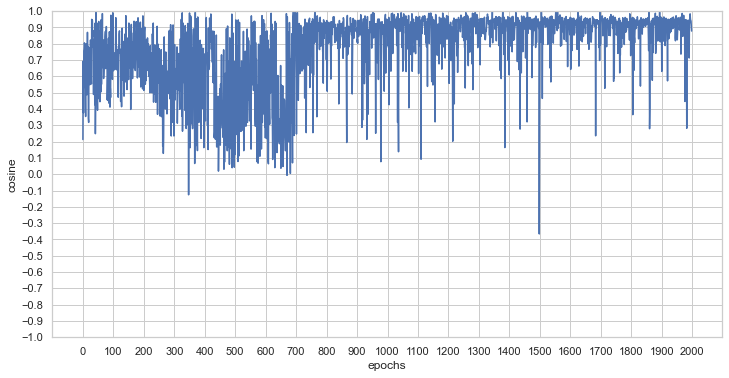

In [182]:
data_df = df
plt.ylim(-1, 1)
plt.yticks(np.arange(-10,11, 1)/10)
plt.xticks(range(0, len(data_df)+100,100))
sns.lineplot(
    x='epochs',
    y='cosine',
    data= data_df)
plt.show()

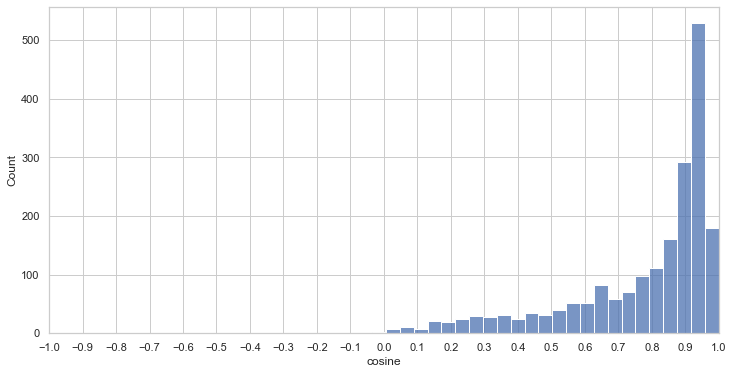

In [183]:
plt.xlim(-1, 1)
plt.xticks(np.arange(-10,11, 1)/10)
sns.histplot(
    df.cosine)
plt.show()

In [184]:
results = json.load(open('./maml_mnli_scitail_2000.txt', 'rb'))

## Accuracy

In [185]:
results_df = pd.DataFrame([],columns=['epoch','accuracy','loss']).reset_index()
del results_df['index']
results_df['epoch'] = np.arange(0,len(results['test']['accuracy']['0']))
results_df['accuracy'] = results['test']['accuracy']['0']
results_df['loss'] = results['test']['losses']['0']


In [186]:
results_df['accuracy'][1000:].std()

0.0028348254050142505

<Figure size 864x432 with 0 Axes>

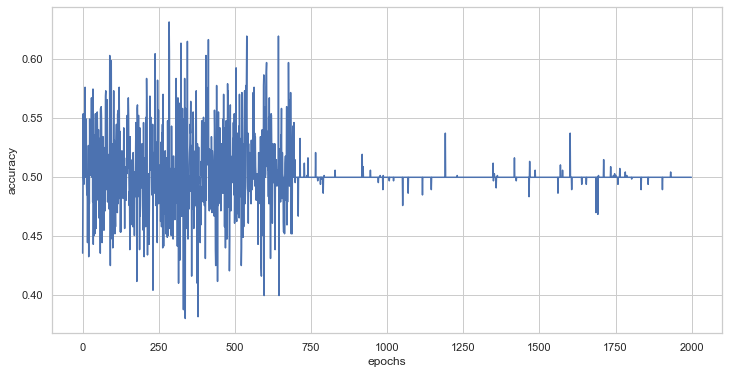

In [187]:
# data_df = df[:1000]
# plt.ylim(-1, 1)
# plt.yticks(np.arange(-10,11, 1)/10)
# plt.xticks(range(0, len(data_df)+100,100))
plt.clf()
fig = plt.figure()
plt.plot(results_df['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

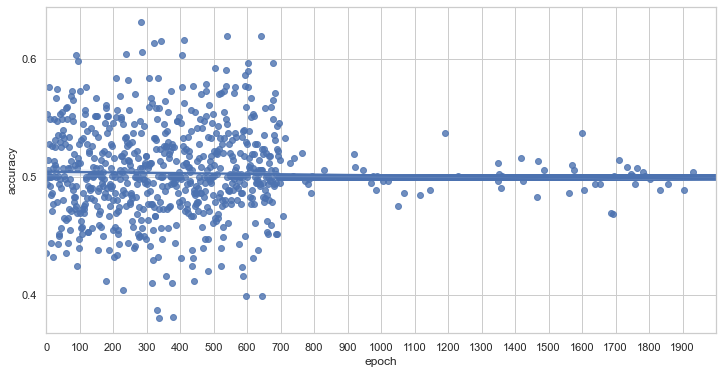

In [188]:
# plt.ylim(0, 1)
plt.yticks(np.arange(-10,11, 1)/10)
plt.xticks(range(0, len(results_df)+100,100))
sns.regplot(x='epoch',y='accuracy',data=results_df)
plt.show()

## Loss

<Figure size 864x432 with 0 Axes>

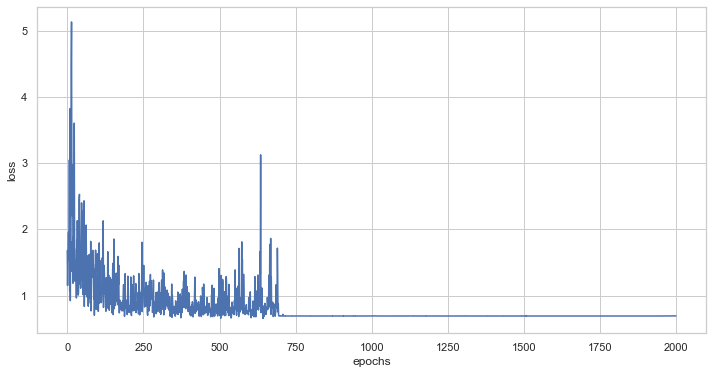

In [189]:
# data_df = df[:1000]
# plt.ylim(-1, 1)
# plt.yticks(np.arange(-10,11, 1)/10)
# plt.xticks(range(0, len(data_df)+100,100))
plt.clf()
fig = plt.figure()
plt.plot(results['test']['losses']['0'][:2000])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()